In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import korean_language

### 분류 : 결정경계선보다 ax + by + c  <> 0 0보다 크냐 작냐에 따라 분류 로 a,b,c 파라미터 최적값을 찾는 것
#### 배치사이즈 : 손실함수(실제값과 예측값 오차)의 계산결과를 가중치에 갱신하는 주기로 전체데이터를 학습후 갱신하거나 데이터를 부분적으로 학습후 가중치를 갱신하는것을 배치사이즈라 함 

---
### 분류의 성능지표는 정확도,재현도,정밀도, 손실함수는 크로스엔트로피(cross-entorpy), 지니계수 등을 사용
#### - 회귀의 손실함수는 오차(MSE, MAE)이며 최적화를 위해 경사하강법을 사용
#### - 분류의 손실함수는 cross-rntopy를 사용하는데 데이터의 category가 불균형일(예로 성별카테고리값이 남자 90명, 여자 10명)때 경우가 많으므로 크로스엔트로피(cross-entorpy)로 보완

---
#### cross-entropy
#### - 정보의 양을 측정할수 있는 방법(기대치, 가치)으로 0에 가까울수록 성능이 좋고 1에 가까울수록 성능이 낮음
#### 계산식 : 실제확률 * log(1/예측확률)
#### - 해당 사건이 발생할 확률을 사용 (e1 -> p1 = 1), 확률(P)이 1이면 정보(I)가 주는 가치는 없고 확률이 0이면 정보는 무한대가 되므로 정보는 확률에 반비례함
#### - 정보량 = log(1/p)
#### - 엔트로피 : 무질서의 정보(degree of desorde)로 불확실성이 가장 높을때

---
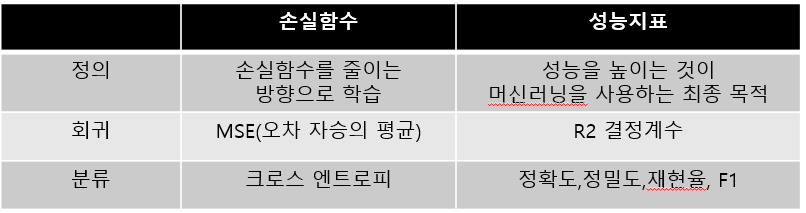
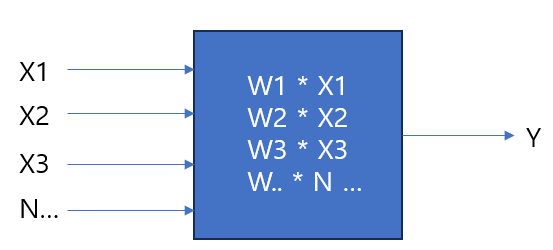


In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [6]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [9]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [12]:
x, y = iris.data, iris.target

In [19]:
x.shape, y.shape

((150, 4), (150,))

In [20]:
type(x)

numpy.ndarray

In [26]:
x[:5,:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [28]:
x2 = x[:,:2]

In [24]:
df = np.concatenate((x,y.reshape(-1,1)), axis=1)
df[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [25]:
from sklearn.model_selection import train_test_split

In [31]:
train_x, test_x, train_y, test_y = train_test_split(x2, y, random_state=7, test_size=0.2, shuffle=True)

In [32]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((105, 2), (45, 2), (105,), (45,))

In [41]:
train_x[:,0][train_y==0]

array([4.8, 5.3, 4.3, 5.4, 5.7, 4.6, 4.6, 4.8, 5.1, 4.8, 4.5, 4.9, 4.4,
       5. , 5.1, 4.4, 5.4, 5.1, 4.9, 5.2, 5. , 5.1, 5.4, 5.2, 5.8, 5.1,
       4.7, 5. , 5. , 5.1, 5.5, 5.1, 4.9, 4.6])

In [45]:
train_y ==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False,  True])

#### train_x[:,0][train_y == i]
#### (해석) array데이터에서 train_y가 참인경우 train_x첫번째 열을 추출하라는 스크립트  

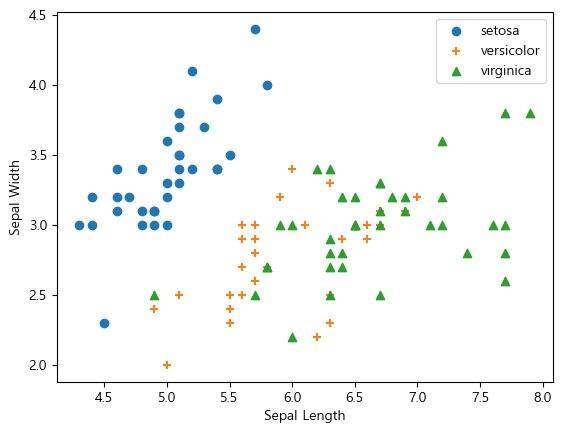

In [48]:
mark =['o','+','^']
for i in range(3):
    xs = train_x[:,0][train_y == i]
    ys = train_x[:,1][train_y == i]
    
    plt.scatter(xs, ys, marker = mark[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()                      

In [54]:
y2 = y.copy()

#### y2 = y  y와 y2는 같은 데이터를 바라보며 y변수의 값을 변경하면 y2갑이 함께 변경됨
#### y2 = y.copy() y, y2의 메모리가 서로 다름
---
#### y2[y2 ==2] y2의 값이 2인 것을 추출하는 조건식
---
#### 분류알고리즘은 일반적으로 아래 번호순에 따라 순차적으로 분류한다, 동시에 분류하는 알고리즘은 randomforest가 있음
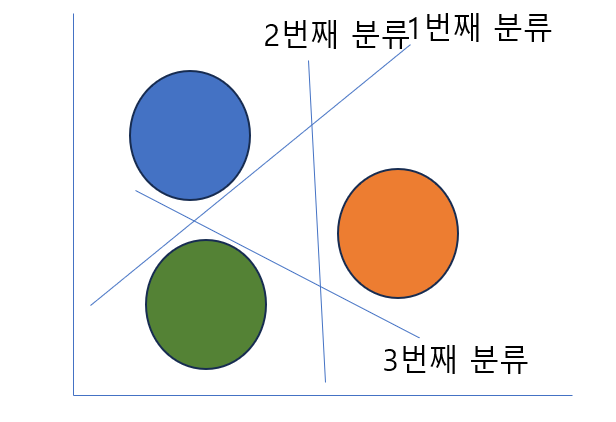

In [58]:
y2[y2 ==2] =1

In [59]:
train_x, test_x, train_y, test_y = train_test_split(x2, y2, random_state=7, test_size=0.2, shuffle=True)

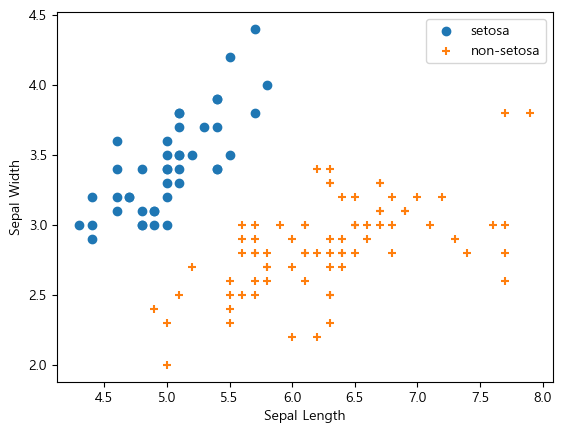

In [62]:
mark =['o','+','^']
for i in range(2):
    xs = train_x[:,0][train_y == i]
    ys = train_x[:,1][train_y == i]
    
    plt.scatter(xs, ys, marker = mark[i])
    
label_names = ['setosa','non-setosa']
plt.legend(label_names)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()  

#### 확률적 경사하강 알고리즘 - Stochastics Gradient Descent 대표적인 선형분류 알고리즘 

In [63]:
from sklearn.linear_model import SGDClassifier

In [64]:
sgd = SGDClassifier()

In [65]:
model = sgd.fit(train_x, train_y)

In [66]:
model

SGDClassifier()

In [68]:
model.score(train_x, train_y)

1.0

In [69]:
model.score(test_x, test_y)

0.9666666666666667

In [77]:
model.predict(test_x)

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
model.coef_, model.intercept_

(array([[ 39.69548668, -66.88417618]]), array([-9.42395785]))

In [82]:
a = model.coef_[0,0]
b = model.coef_[0,1]
c = model.intercept_[0]

a,b,c

(39.695486677541915, -66.88417618270766, -9.423957848156348)

## 결정경계선
### a,b = coef
### c= intercept
---
###  ax + by + c = 0
#### -> by = -ax -c
#### -> y = (-a/b) * x + (-c/b)

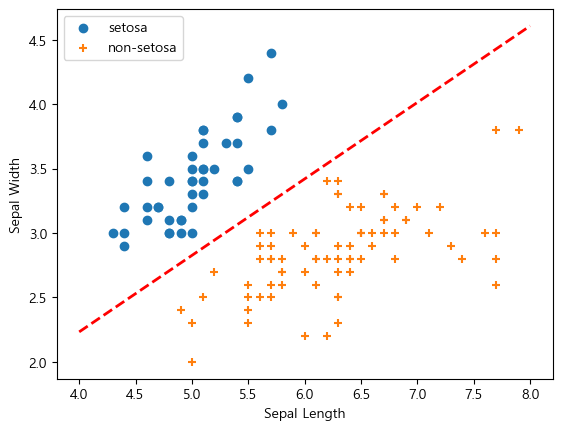

In [86]:
mark =['o','+','^']
for i in range(2):
    xs = train_x[:,0][train_y == i]
    ys = train_x[:,1][train_y == i]
    
    plt.scatter(xs, ys, marker = mark[i])
    
label_names = ['setosa','non-setosa']
plt.legend(label_names)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

xx = np.linspace(4,8,10)
plt.plot( xx, (-a/b * xx + -c/b), 'r--', linewidth =2)

plt.show()  

In [84]:
model.predict([[4.5, 3.5]])

array([0])

In [85]:
model.predict([[6.5, 2.5]])

array([1])

### 교차검증 Cross Validation 
#### -  KFold(행건수, 조각수, shuffle=True)
#### - cross_val_score(모델명, 독립변수, 종속변수, KFold변수)
#### - 훈련데이터를 여러 조각으로 분리해 학습하고 평균값으로 성능을 측정함

In [94]:
from sklearn.model_selection import cross_val_score, KFold

In [97]:
cv = KFold(n_splits=5, shuffle=True)

In [98]:
cross_val_score(model, x2, y2, cv = cv)

array([1.        , 0.93333333, 1.        , 1.        , 0.96666667])

### 전체데이터를 사용 

In [101]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=7, test_size=0.2, shuffle=True)

In [102]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((120, 4), (30, 4), (120,), (30,))

In [103]:
model_sgd = SGDClassifier()

In [104]:
model_sgd.fit(train_x, train_y)

SGDClassifier()

In [107]:
model_sgd.score(test_x, test_y)

0.8

In [108]:
pred = model_sgd.predict(test_x)

In [109]:
cv = KFold(n_splits=5, shuffle=True)

In [110]:
cross_val_score(model_sgd, x, y, cv = cv)

array([0.8       , 0.6       , 0.9       , 0.7       , 0.96666667])

In [111]:
from sklearn.linear_model import LogisticRegression

In [124]:
lr = LogisticRegression(max_iter=1000)

In [125]:
lr.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [126]:
scr = cross_val_score(lr, x, y)

In [127]:
scr

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [128]:
scr.mean()

0.9733333333333334